# 杭州萧山区项目
## 本地排放清单与MEIC比较
## `Compare local emis with MEIC`

---
*@author: Evan*\
*@date: 2023-07-16*

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import os

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.io.shapereader import Reader

from cnmaps import get_adm_maps, clip_quiver_by_map, clip_contours_by_map, draw_map, clip_pcolormesh_by_map
import geopandas as gpd
from shapely.ops import unary_union

import sys
sys.path.append('../../src/')
from namelist import *
import findpoint as fp
from plotfunctions import *

In [2]:
local_ind = xr.open_dataset(local_ind_point)
local_ind

<xarray.Dataset>
Dimensions:    (y: 138, x: 135)
Coordinates:
    longitude  (y, x) float32 ...
    latitude   (y, x) float32 ...
Dimensions without coordinates: y, x
Data variables:
    SO2        (y, x) float32 ...
    NOx        (y, x) float32 ...
    CO         (y, x) float32 ...
    PM10       (y, x) float32 ...
    PM25       (y, x) float32 ...
    VOCs       (y, x) float32 ...
    NH3        (y, x) float32 ...
    BC         (y, x) float32 ...
    OC         (y, x) float32 ...

In [3]:
meic_ind = xr.open_dataset(meic_ind_file)
meic_ind

<xarray.Dataset>
Dimensions:  (TSTEP: 12, VAR: 74, DATE-TIME: 2, LAY: 1, ROW: 138, COL: 135)
Dimensions without coordinates: TSTEP, VAR, DATE-TIME, LAY, ROW, COL
Data variables: (12/75)
    TFLAG    (TSTEP, VAR, DATE-TIME) int32 ...
    NO2      (TSTEP, LAY, ROW, COL) float32 ...
    NO       (TSTEP, LAY, ROW, COL) float32 ...
    HONO     (TSTEP, LAY, ROW, COL) float32 ...
    CO       (TSTEP, LAY, ROW, COL) float32 ...
    SO2      (TSTEP, LAY, ROW, COL) float32 ...
    ...       ...
    PMN      (TSTEP, LAY, ROW, COL) float32 ...
    PH2O     (TSTEP, LAY, ROW, COL) float32 ...
    PMOTHR   (TSTEP, LAY, ROW, COL) float32 ...
    PMC      (TSTEP, LAY, ROW, COL) float32 ...
    HCL      (TSTEP, LAY, ROW, COL) float32 ...
    CL2      (TSTEP, LAY, ROW, COL) float32 ...
Attributes: (12/33)
    IOAPI_VERSION:  ioapi-3.2: $Id: init3.F90 185 2020-08-28 16:49:45Z coats ...
    EXEC_ID:        mcip                                                     ...
    FTYPE:          1
    CDATE:          2023150
    CTIME:          71221
    WDATE:          2023150
    ...             ...
    VGLVLS:         [1.     0.9979]
    GDNAM:          CN3XS_135X138_CR
    UPNAM:          OUTGM3IO        
    VAR-LIST:       NO2             NO              HONO            CO       ...
    FILEDESC:       US EPA COMMUNITY MULTISCALE AIR QUALITY MODEL            ...
    HISTORY:

In [4]:
zhejiang = get_adm_maps(province='浙江省', record='first', only_polygon=True)
hangzhou  = get_adm_maps(city='杭州市', record='first', only_polygon=True)
xiaoshan = get_adm_maps(district='萧山区', record='first', only_polygon=True)

In [ ]:
lon = local_ind.longitude
lat = local_ind.latitude

shp = gpd.read_file('D:/data/Project_Xiaoshan/shapefile/Xiaoshan_Buffer/Xiaoshan_Buffer.shp')
mask = polygon_to_mask(shp.geometry[0],lon,lat)
mask_da = xr.DataArray(mask,dims=('ROW','COL'))

## NOx

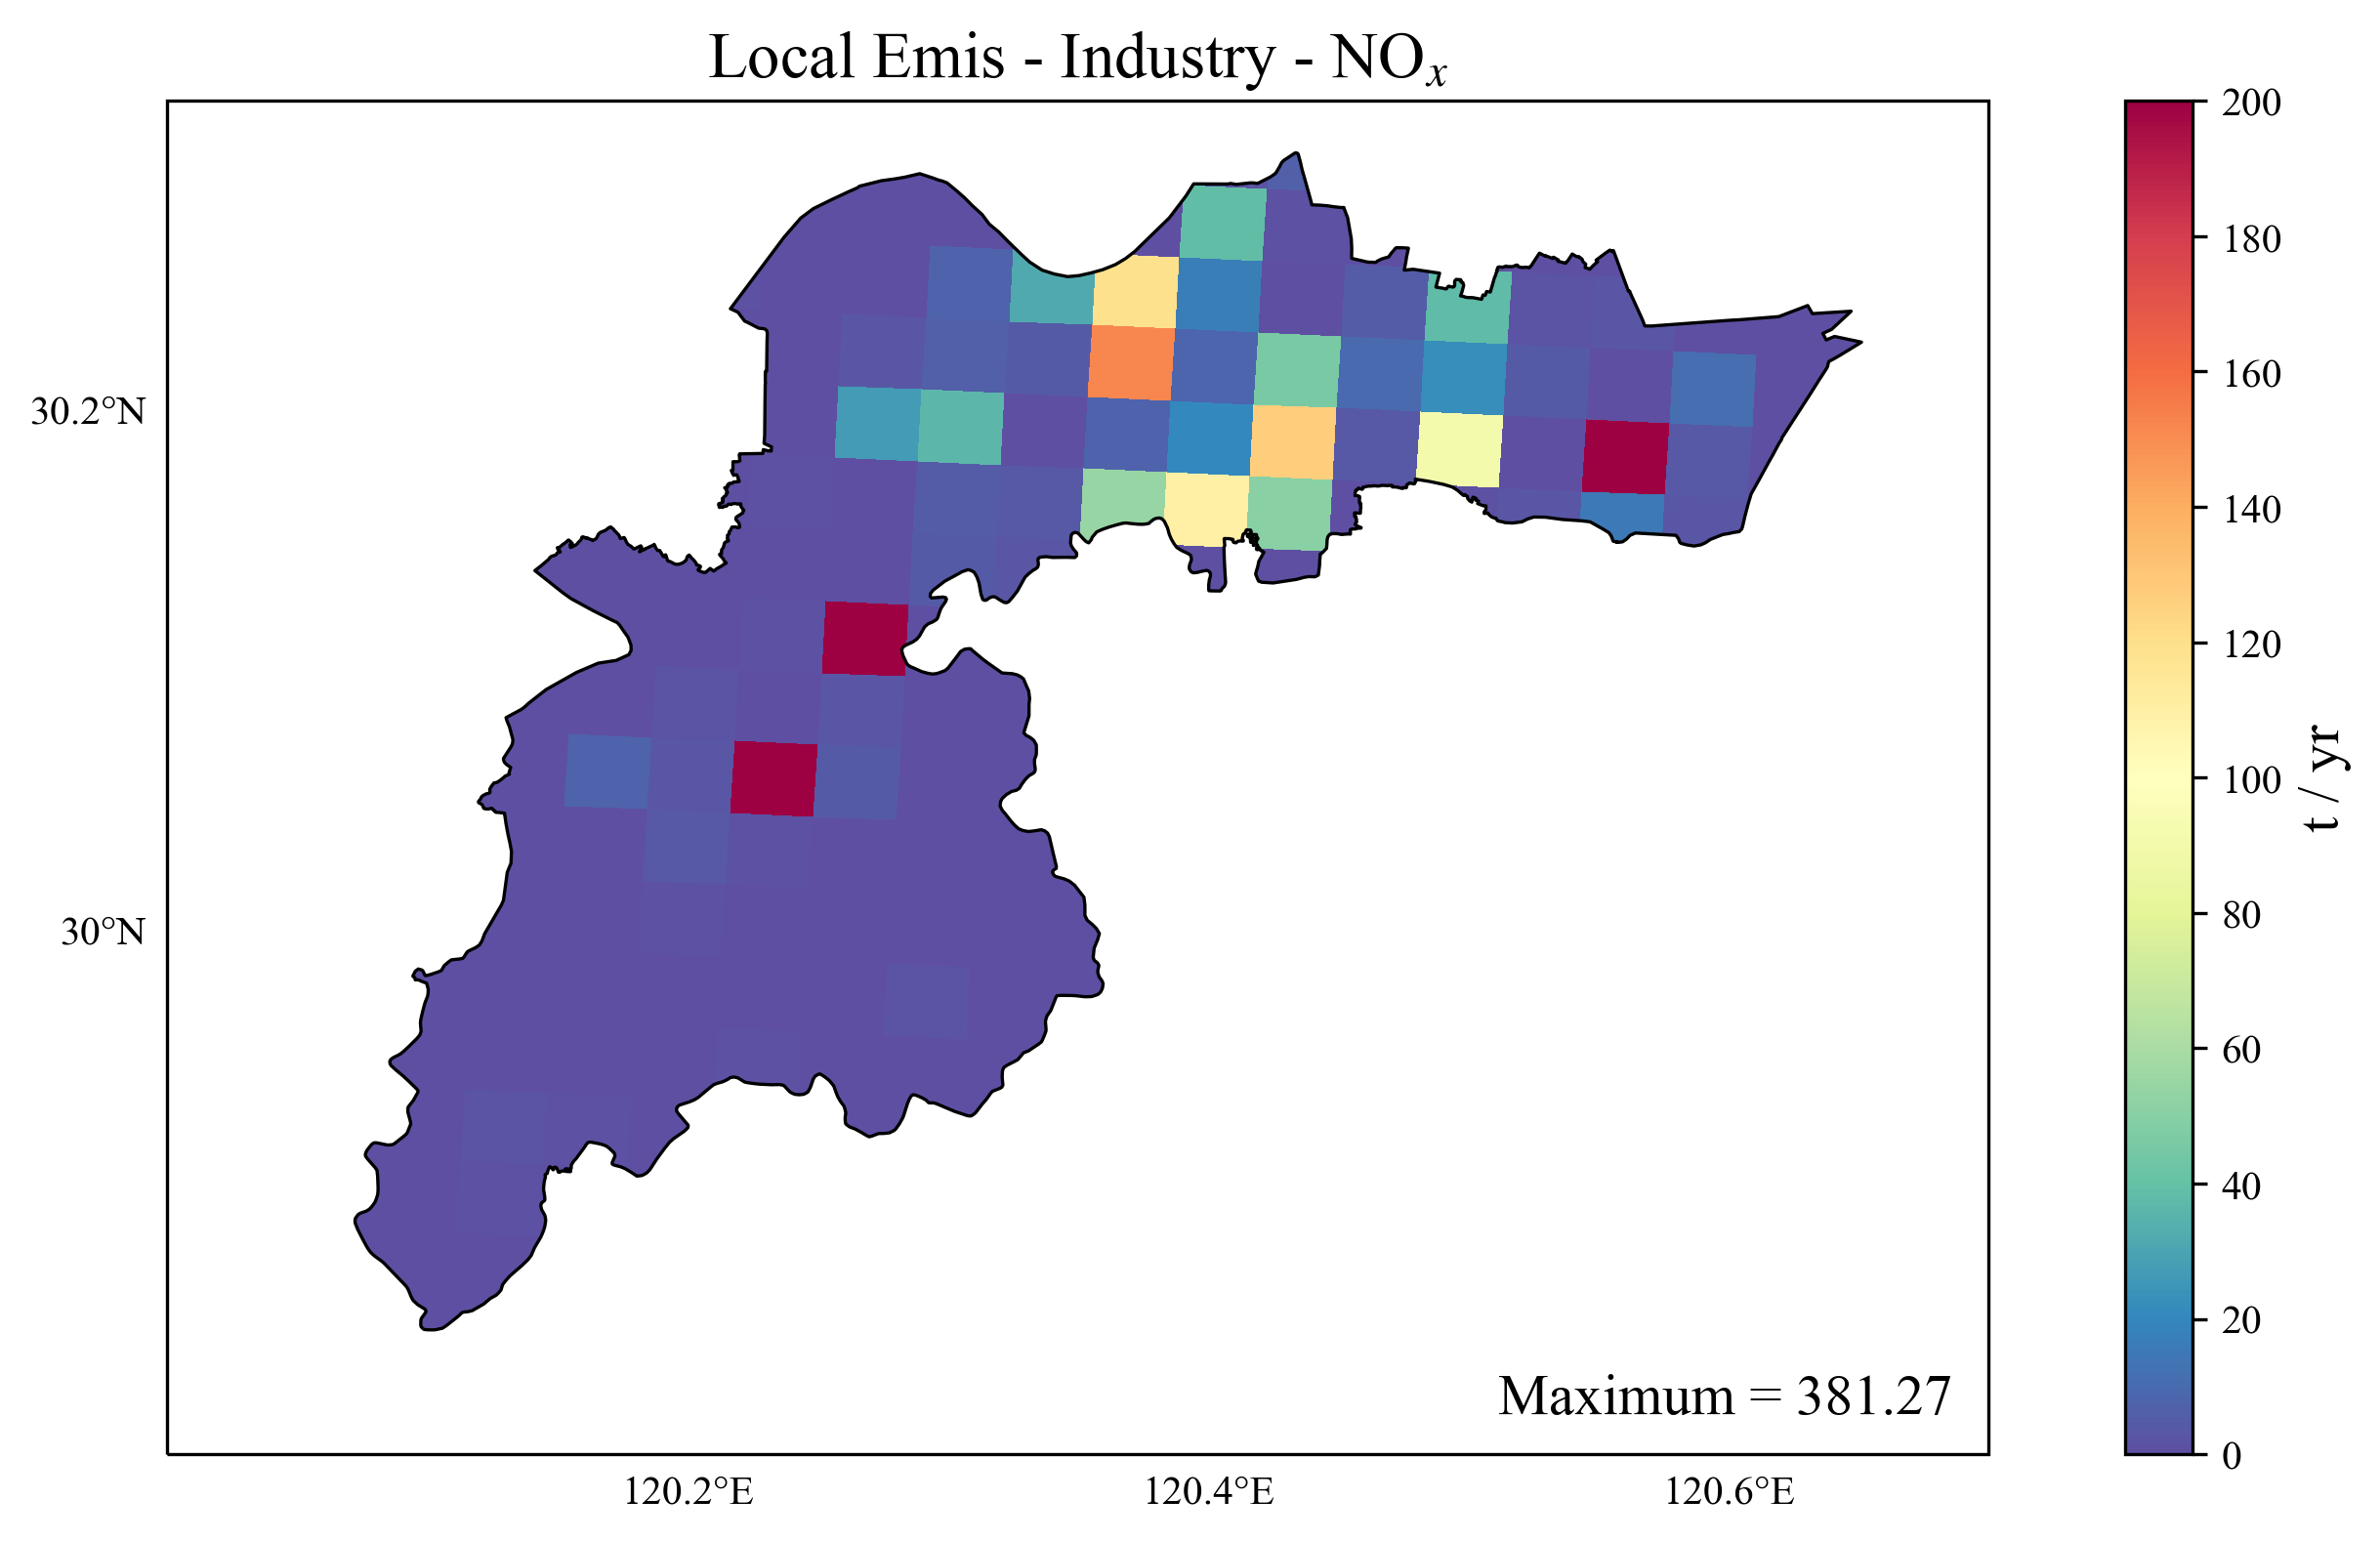

In [5]:
data = local_ind.NOx.squeeze()

cmin=0
cmax=200

ax = pcolor_xiaoshan(lon,lat,data,cmin=0,cmax=200,
                map_polygon=xiaoshan,mask_polygon=xiaoshan,
                extent=[120., 120.7, 29.8, 30.32],colorlevel=20)
ax.set_title('Local Emis - Industry - NO$_x$',size=16)
plt.show()


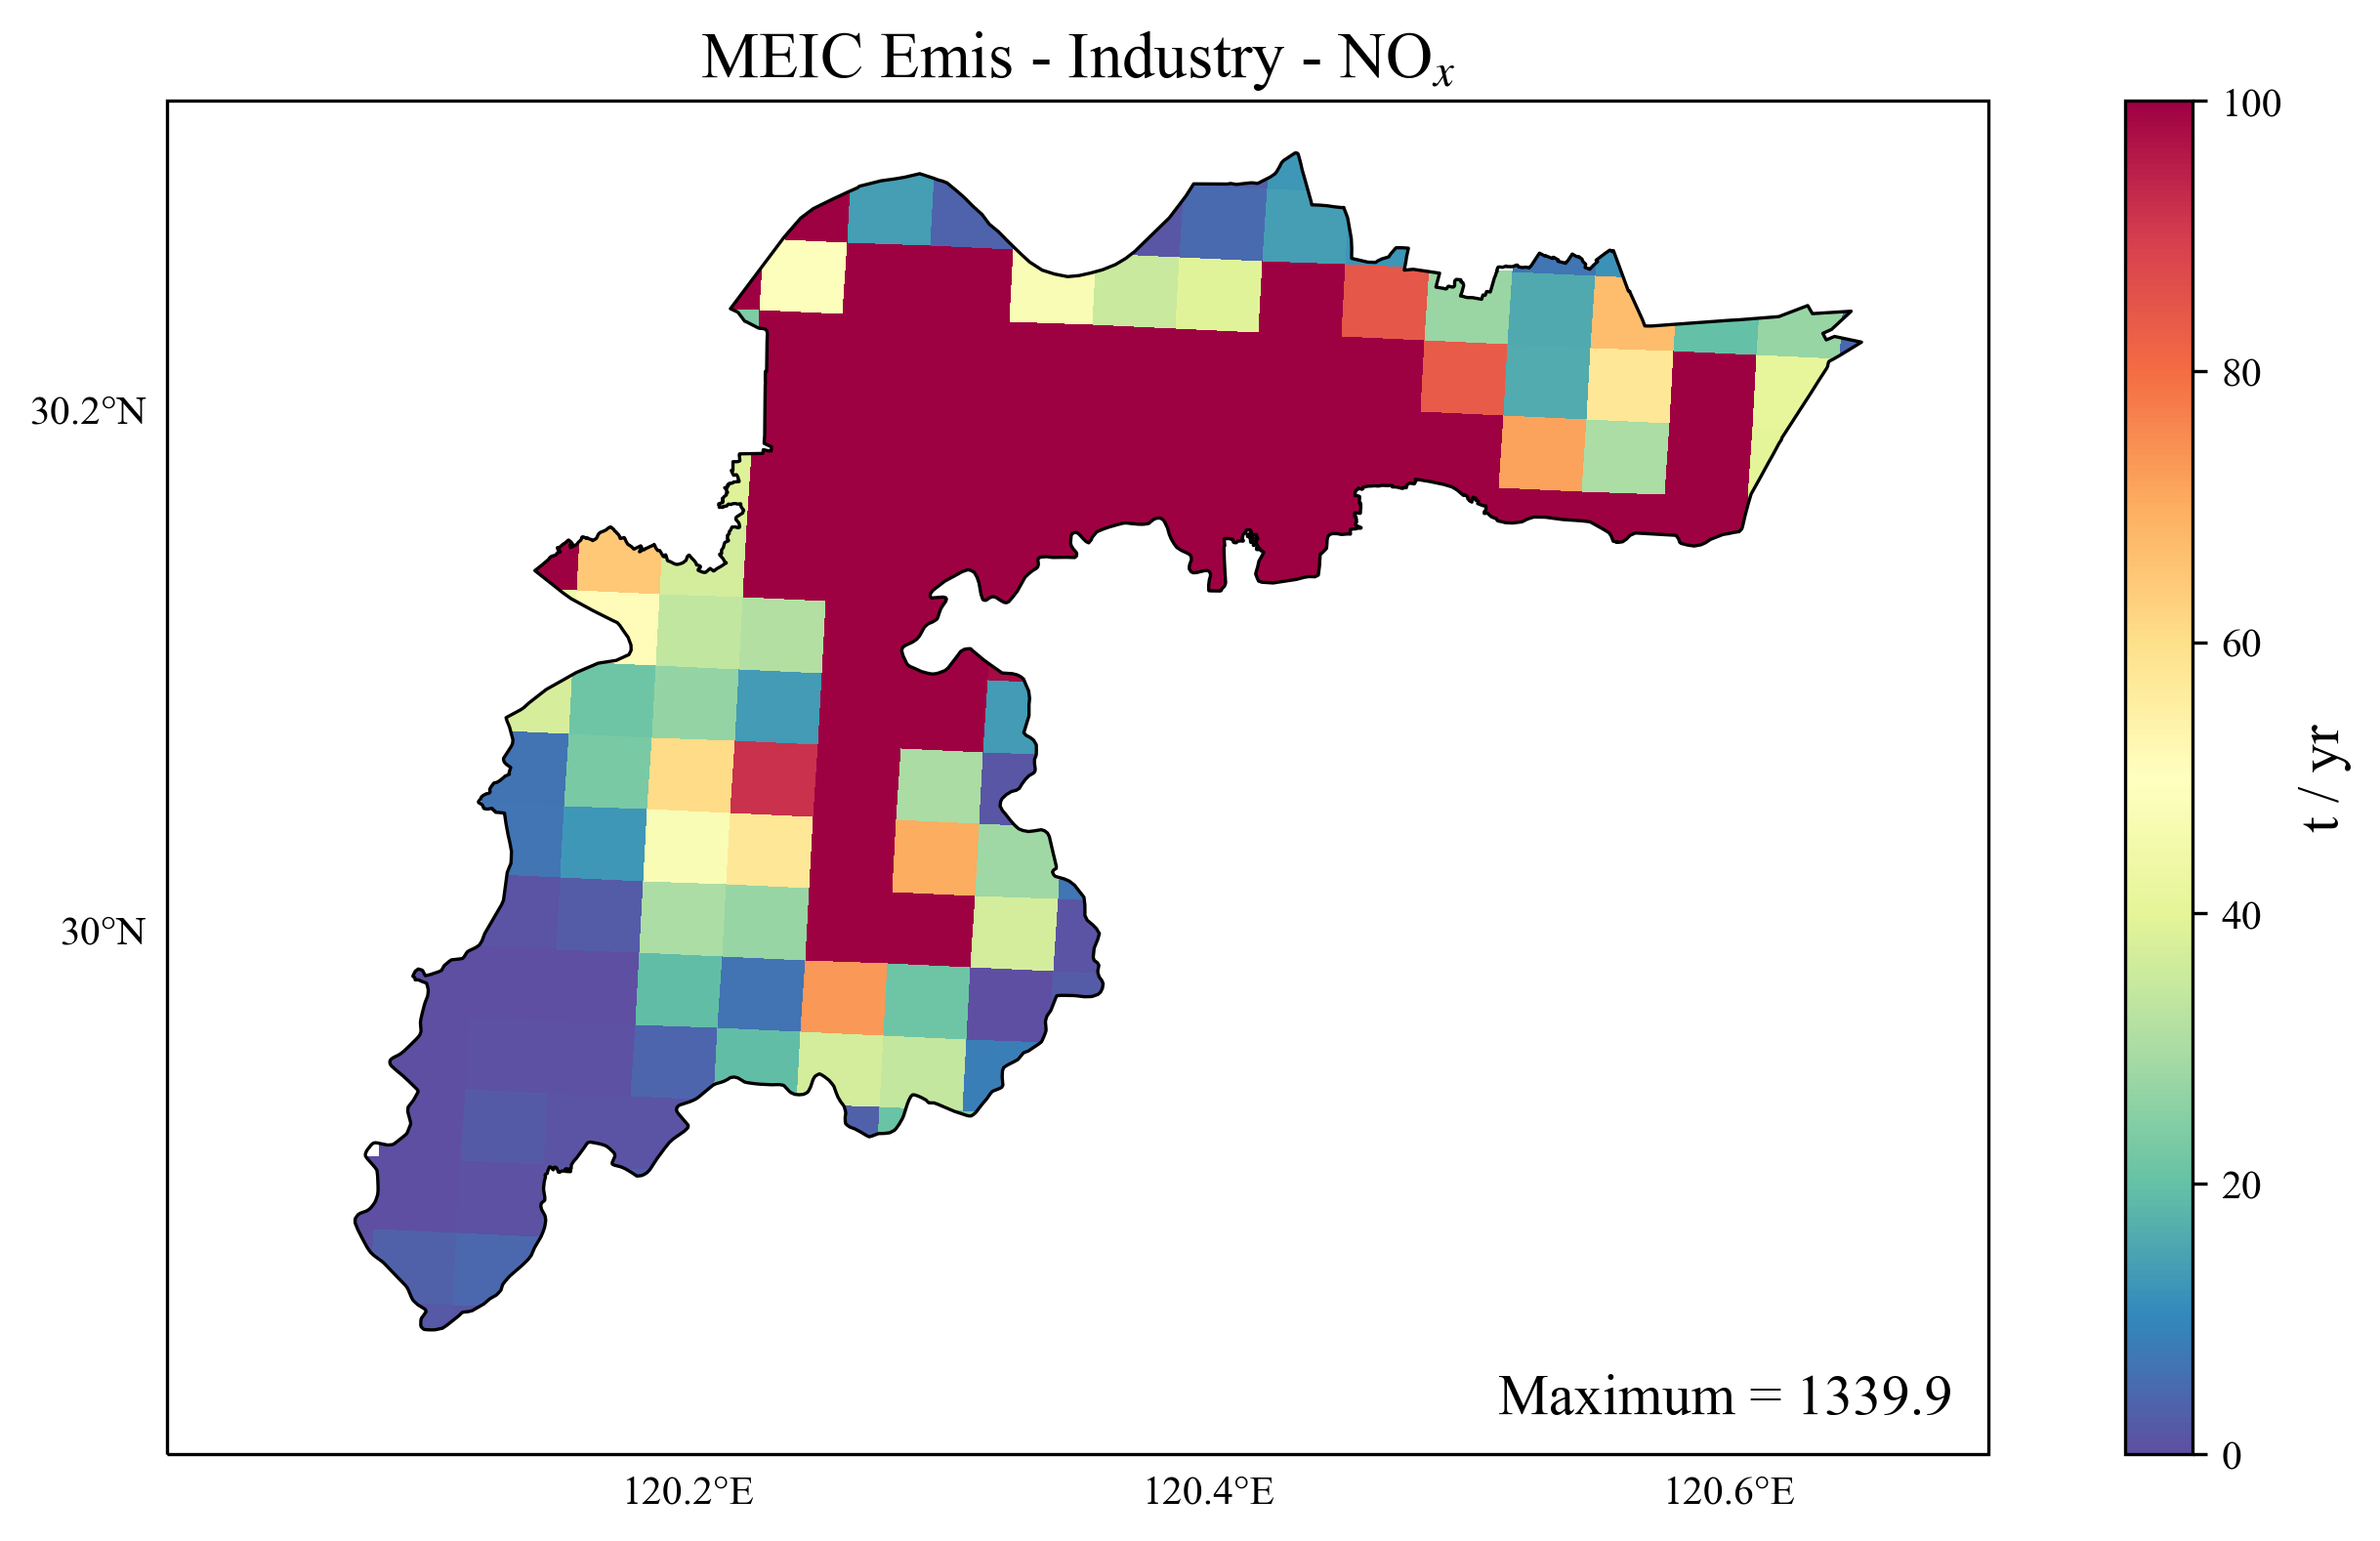

In [25]:
NO = meic_ind.NO.sum(dim='TSTEP').squeeze()
NO_xs = NO.where(mask_da)
NO2 = meic_ind.NO2.sum(dim='TSTEP').squeeze()
NO2_xs = NO2.where(mask_da)

data = (NO_xs*31 + NO2_xs*47)

cmin   = 0
cmax   = 100
clevel = 20

ax = pcolor_xiaoshan(lon,lat,data,cmin,cmax,
                map_polygon=xiaoshan,mask_polygon=xiaoshan,
                extent=[120., 120.7, 29.8, 30.32],colorlevel=clevel)
ax.set_title('MEIC Emis - Industry - NO$_x$',size=16)
plt.show()

## SO2

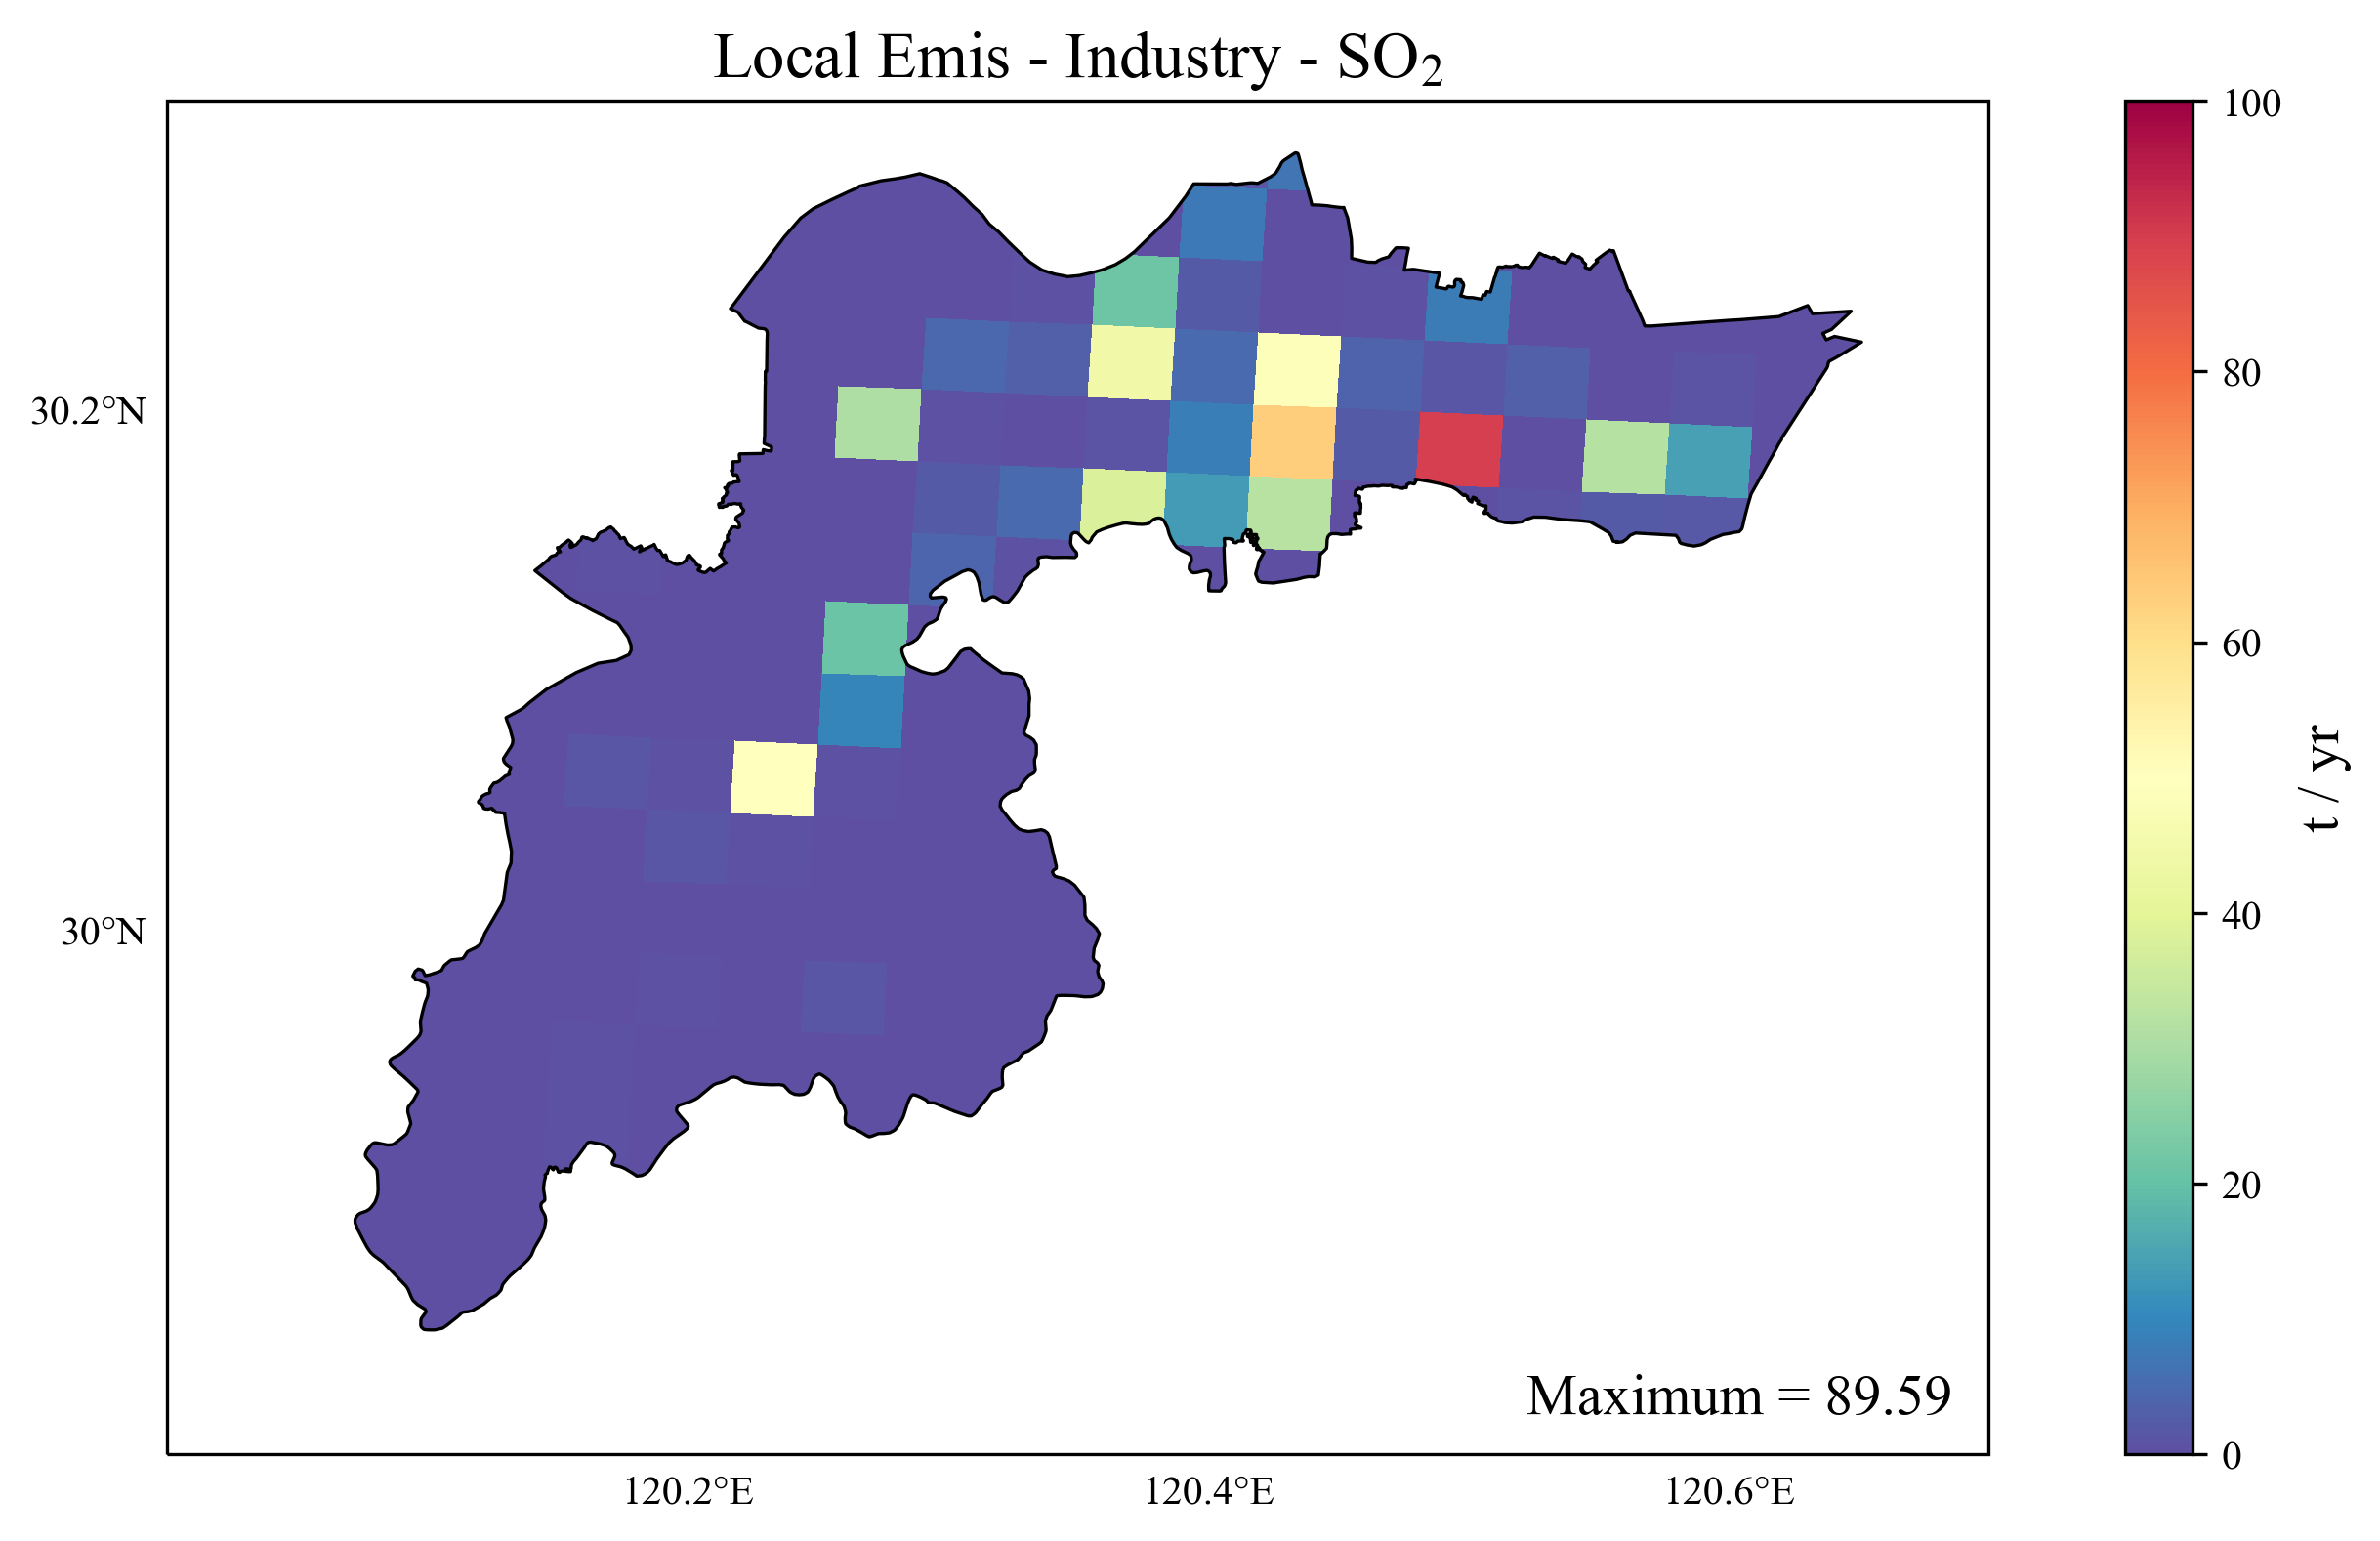

In [12]:
data = local_ind.SO2.squeeze()

cmin=0
cmax=100
clevel = 20

ax = pcolor_xiaoshan(lon,lat,data,cmin,cmax,
                map_polygon=xiaoshan,mask_polygon=xiaoshan,
                extent=[120., 120.7, 29.8, 30.32],colorlevel=clevel)
ax.set_title('Local Emis - Industry - SO$_2$',size=16)
plt.show()


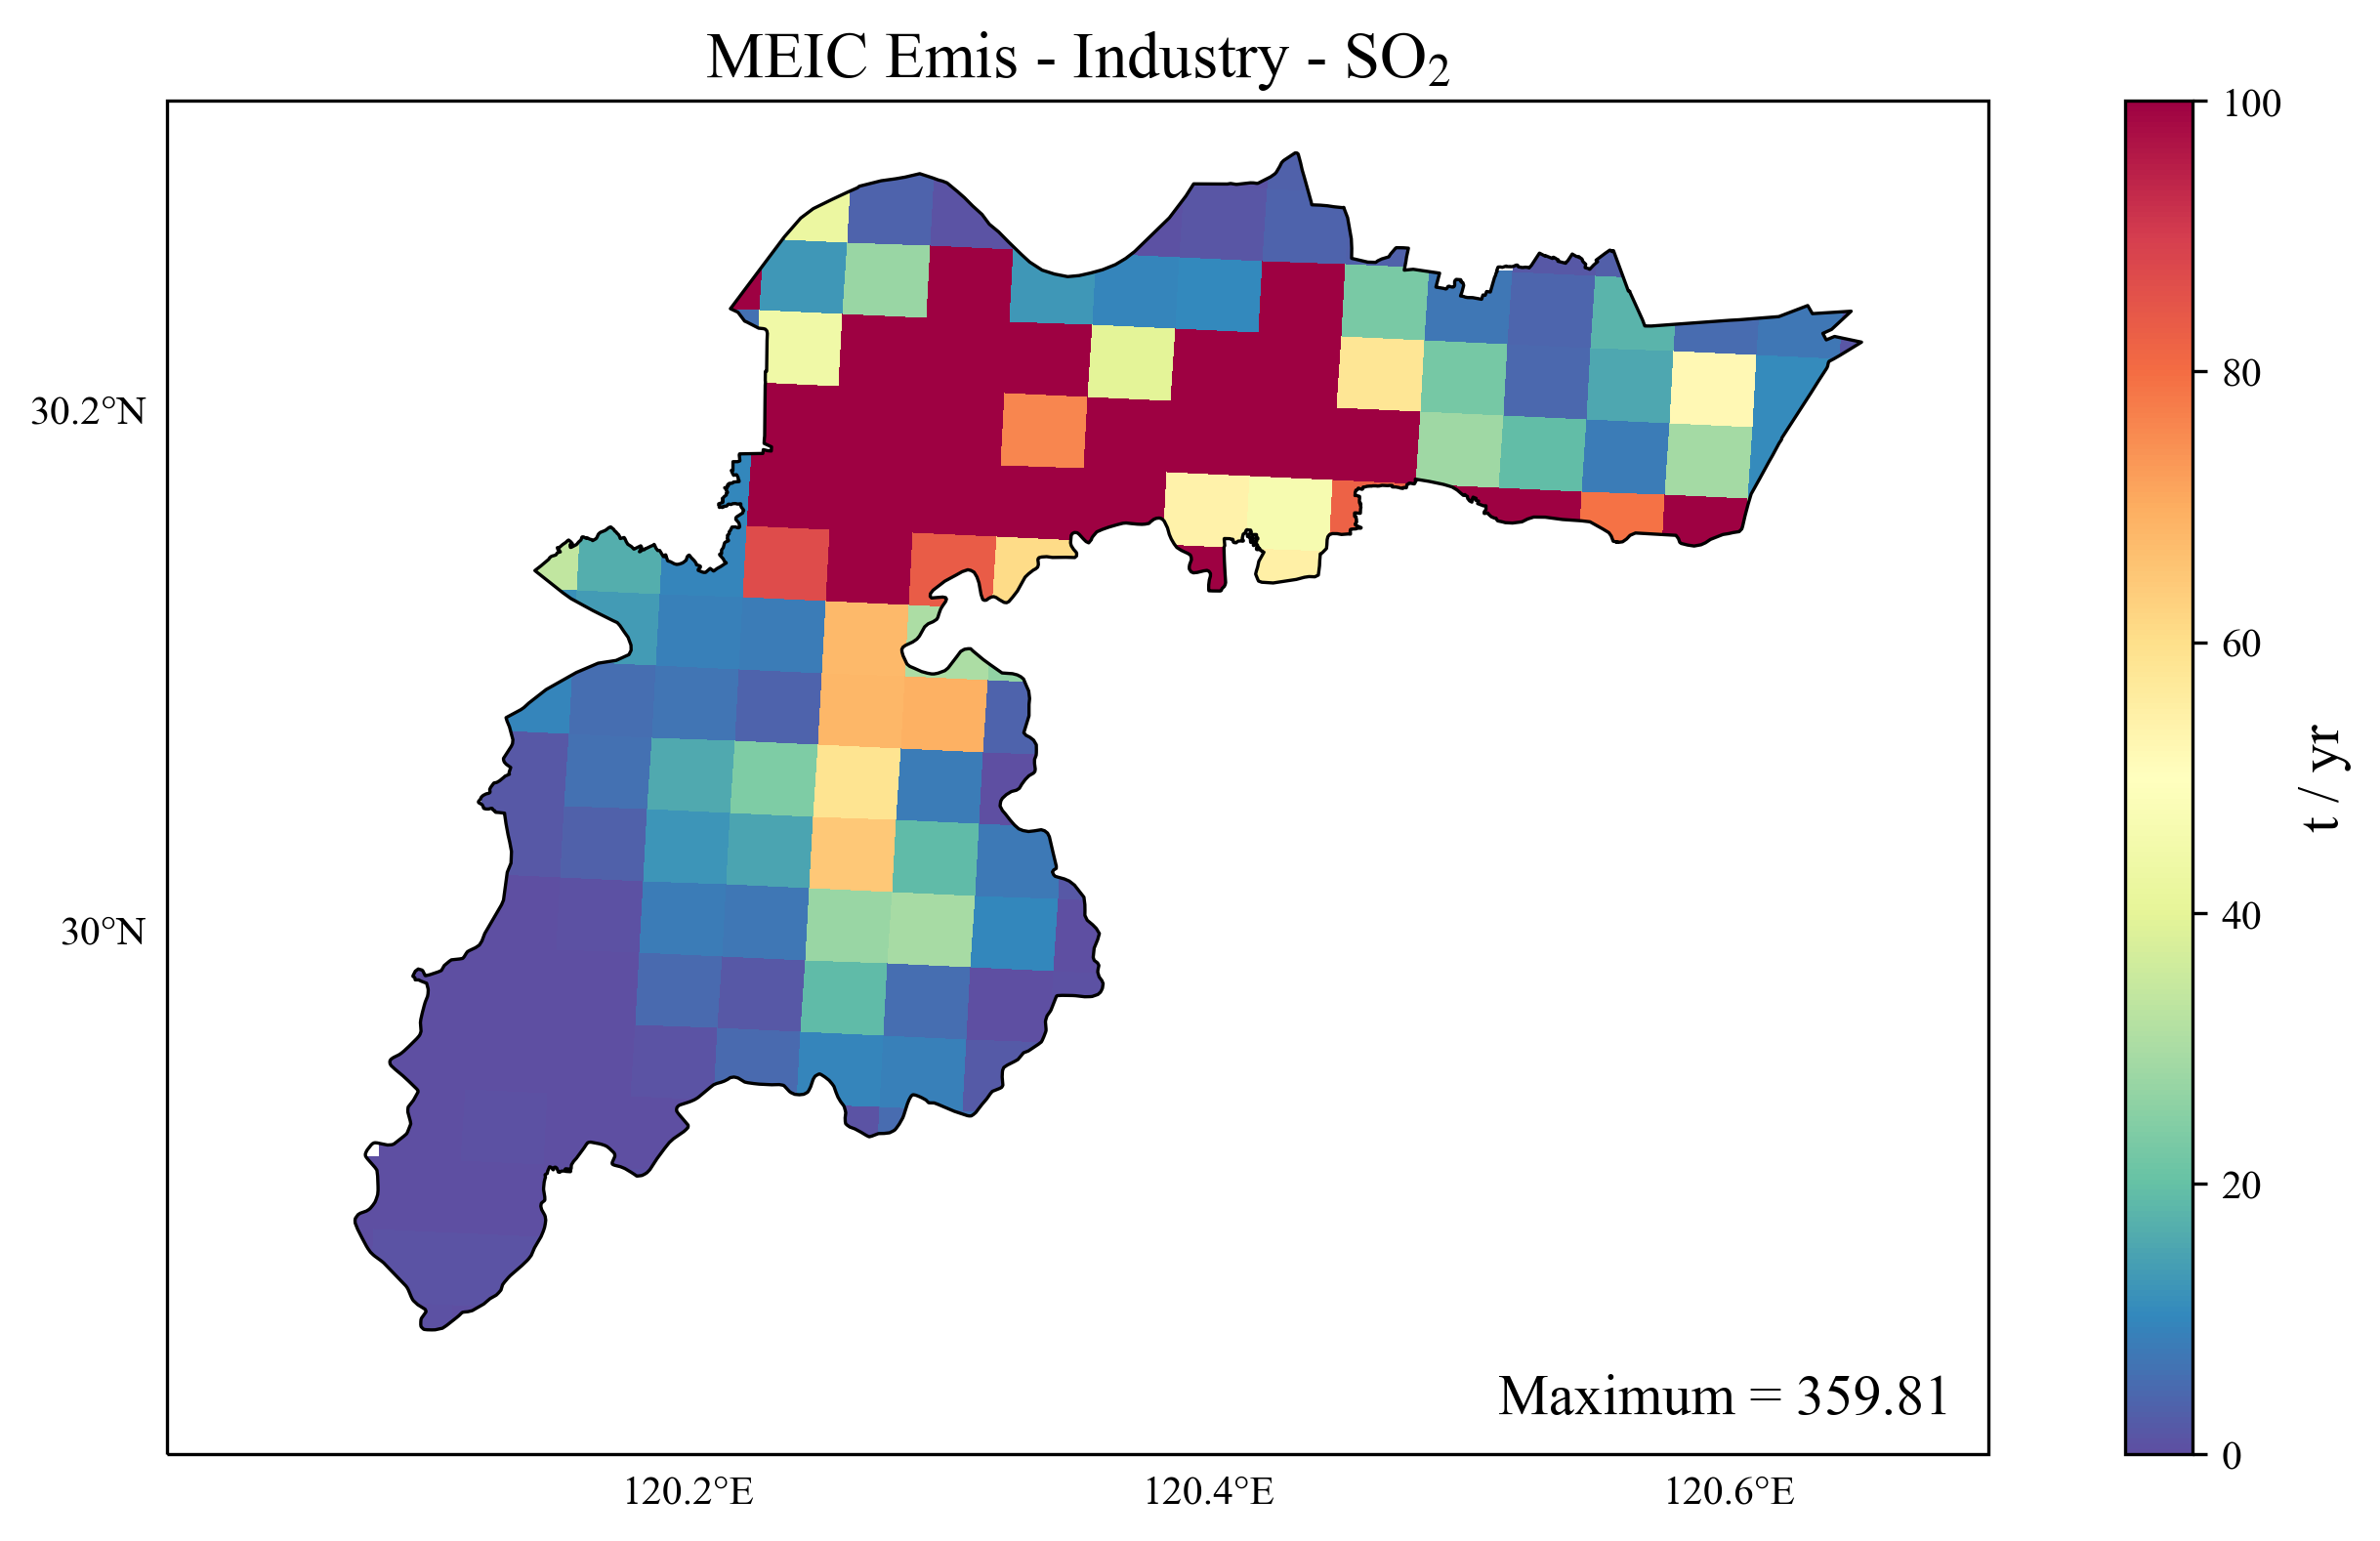

In [13]:
SO2 = meic_ind.SO2.sum(dim='TSTEP').squeeze()
SO2_xs = SO2.where(mask_da)

data = (SO2_xs*64)

cmin   = 0
cmax   = 100
clevel = 20

ax = pcolor_xiaoshan(lon,lat,data,cmin,cmax,
                map_polygon=xiaoshan,mask_polygon=xiaoshan,
                extent=[120., 120.7, 29.8, 30.32],colorlevel=clevel)
ax.set_title('MEIC Emis - Industry - SO$_2$',size=16)
plt.show()

## CO

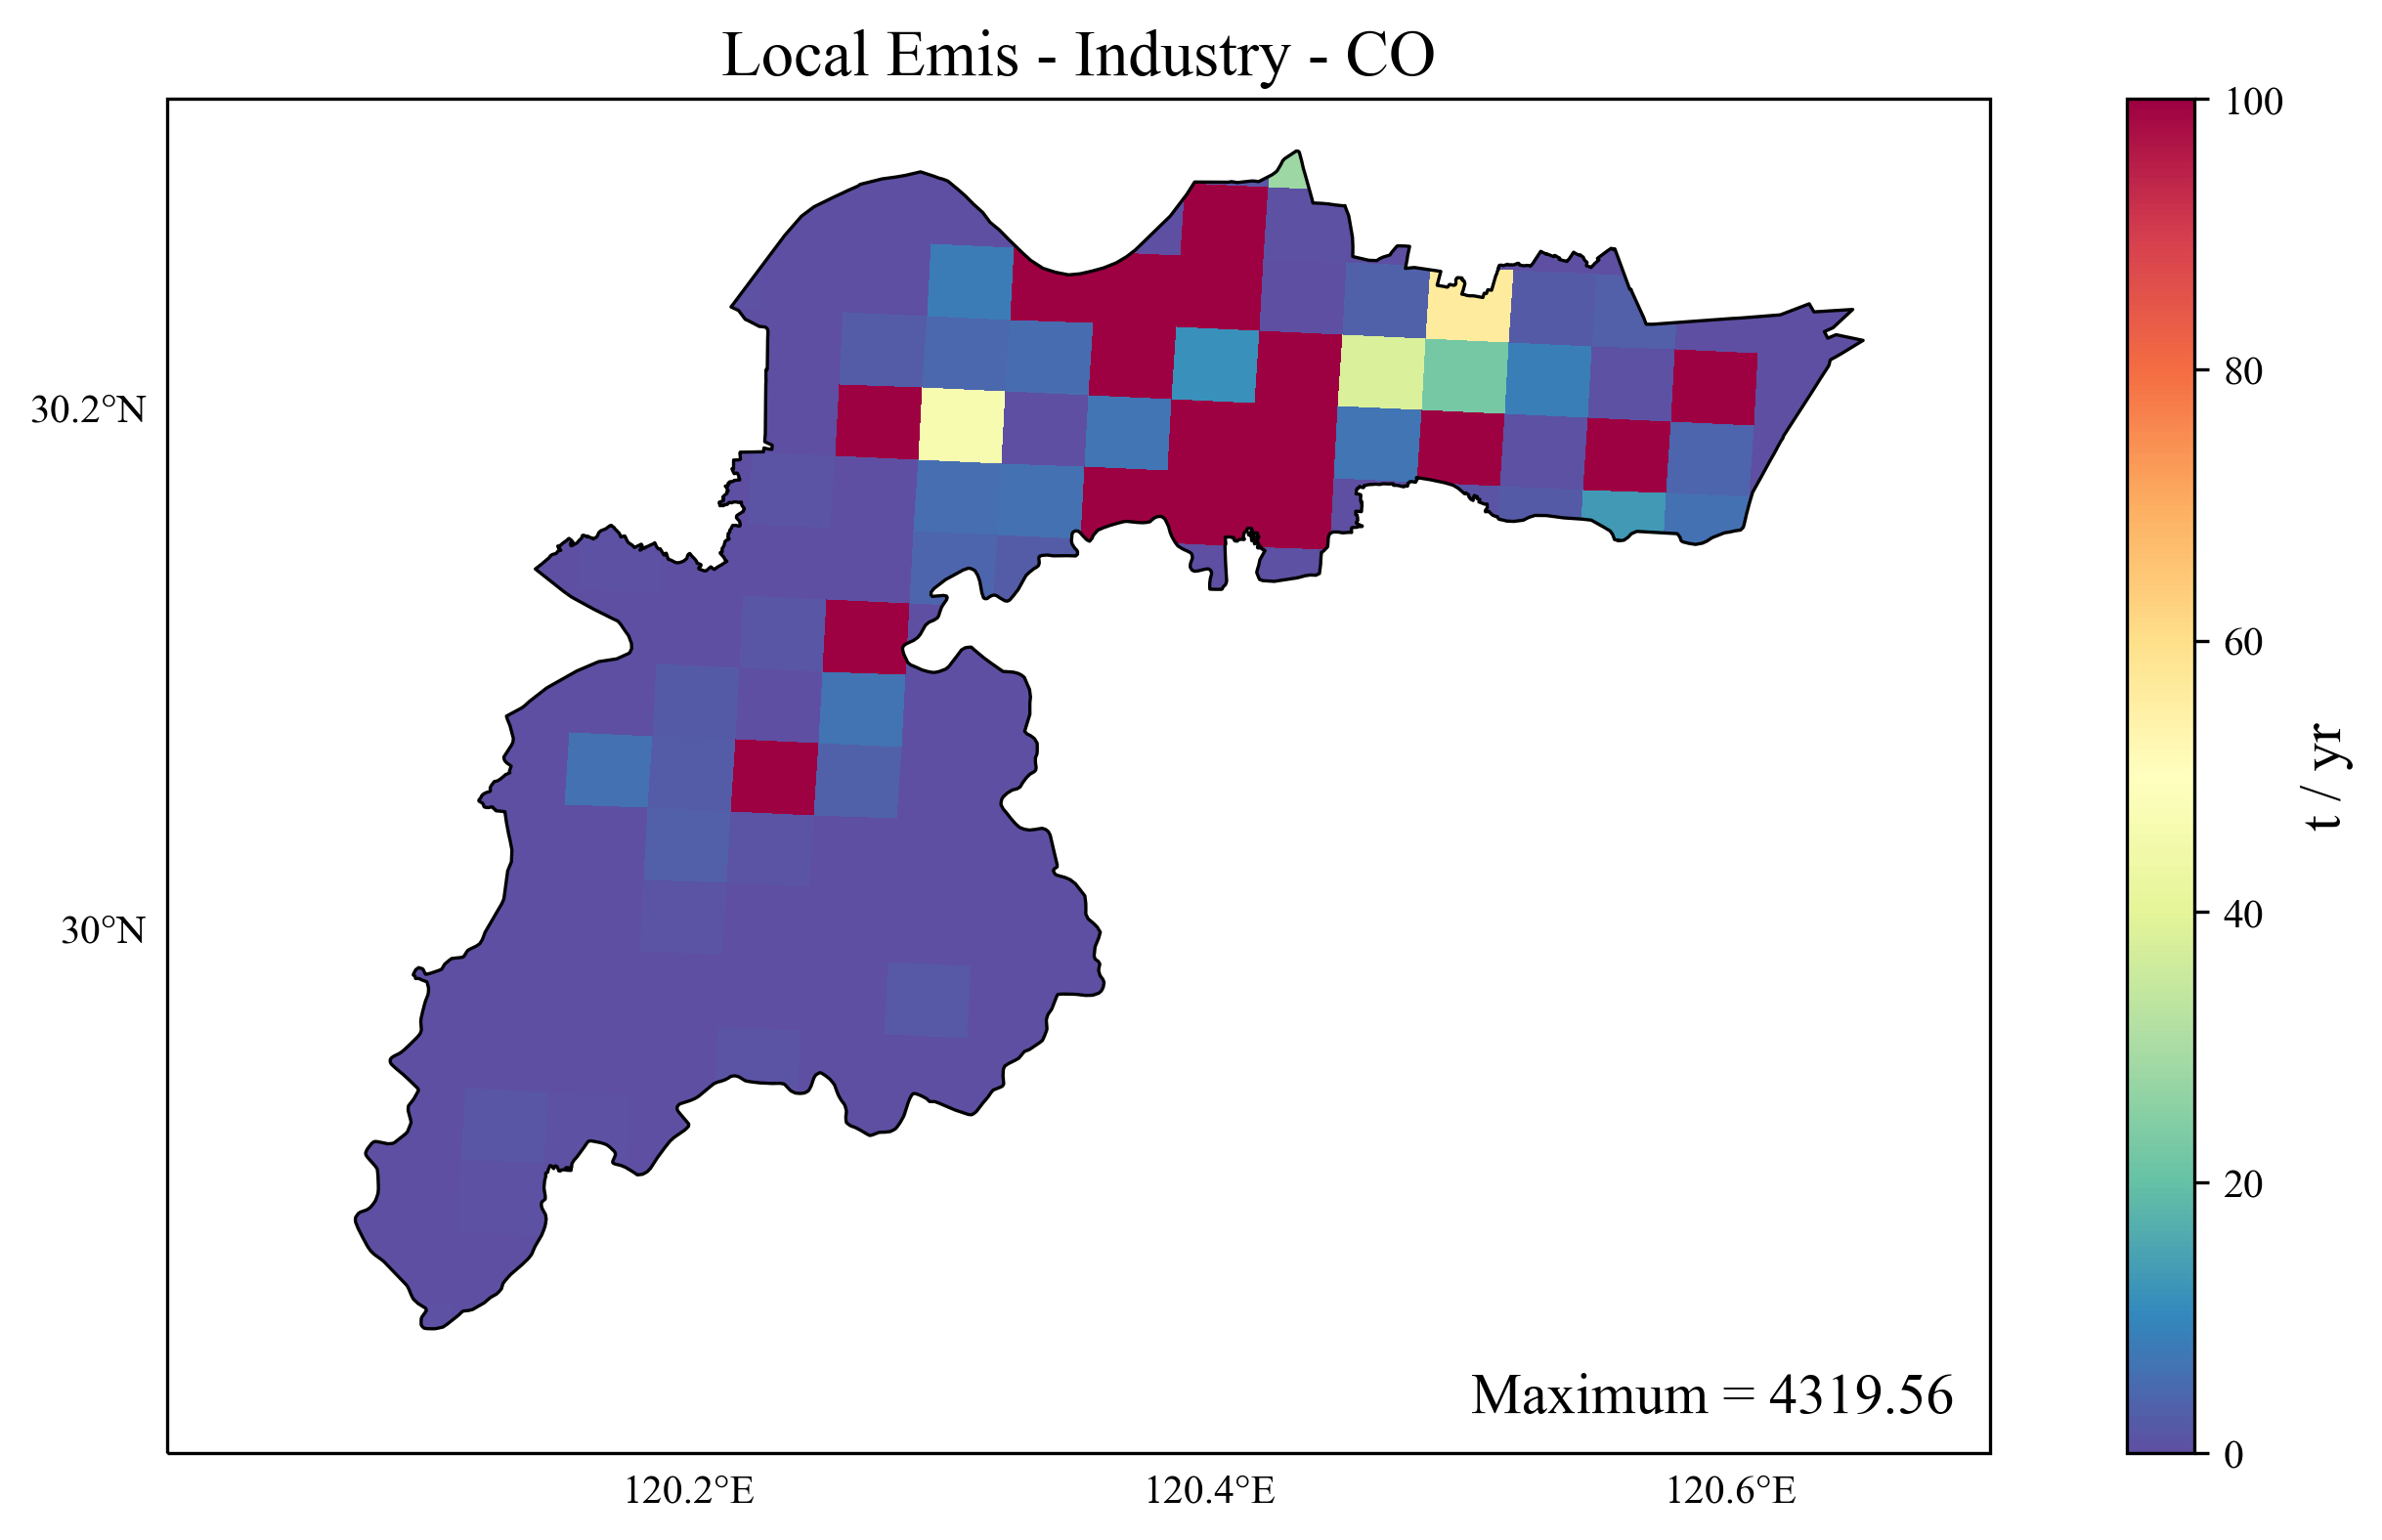

In [14]:
data = local_ind.CO.squeeze()

cmin   = 0
cmax   = 100
clevel = 20

ax = pcolor_xiaoshan(lon,lat,data,cmin,cmax,
                map_polygon=xiaoshan,mask_polygon=xiaoshan,
                extent=[120., 120.7, 29.8, 30.32],colorlevel=clevel)
ax.set_title('Local Emis - Industry - CO',size=16)
plt.show()


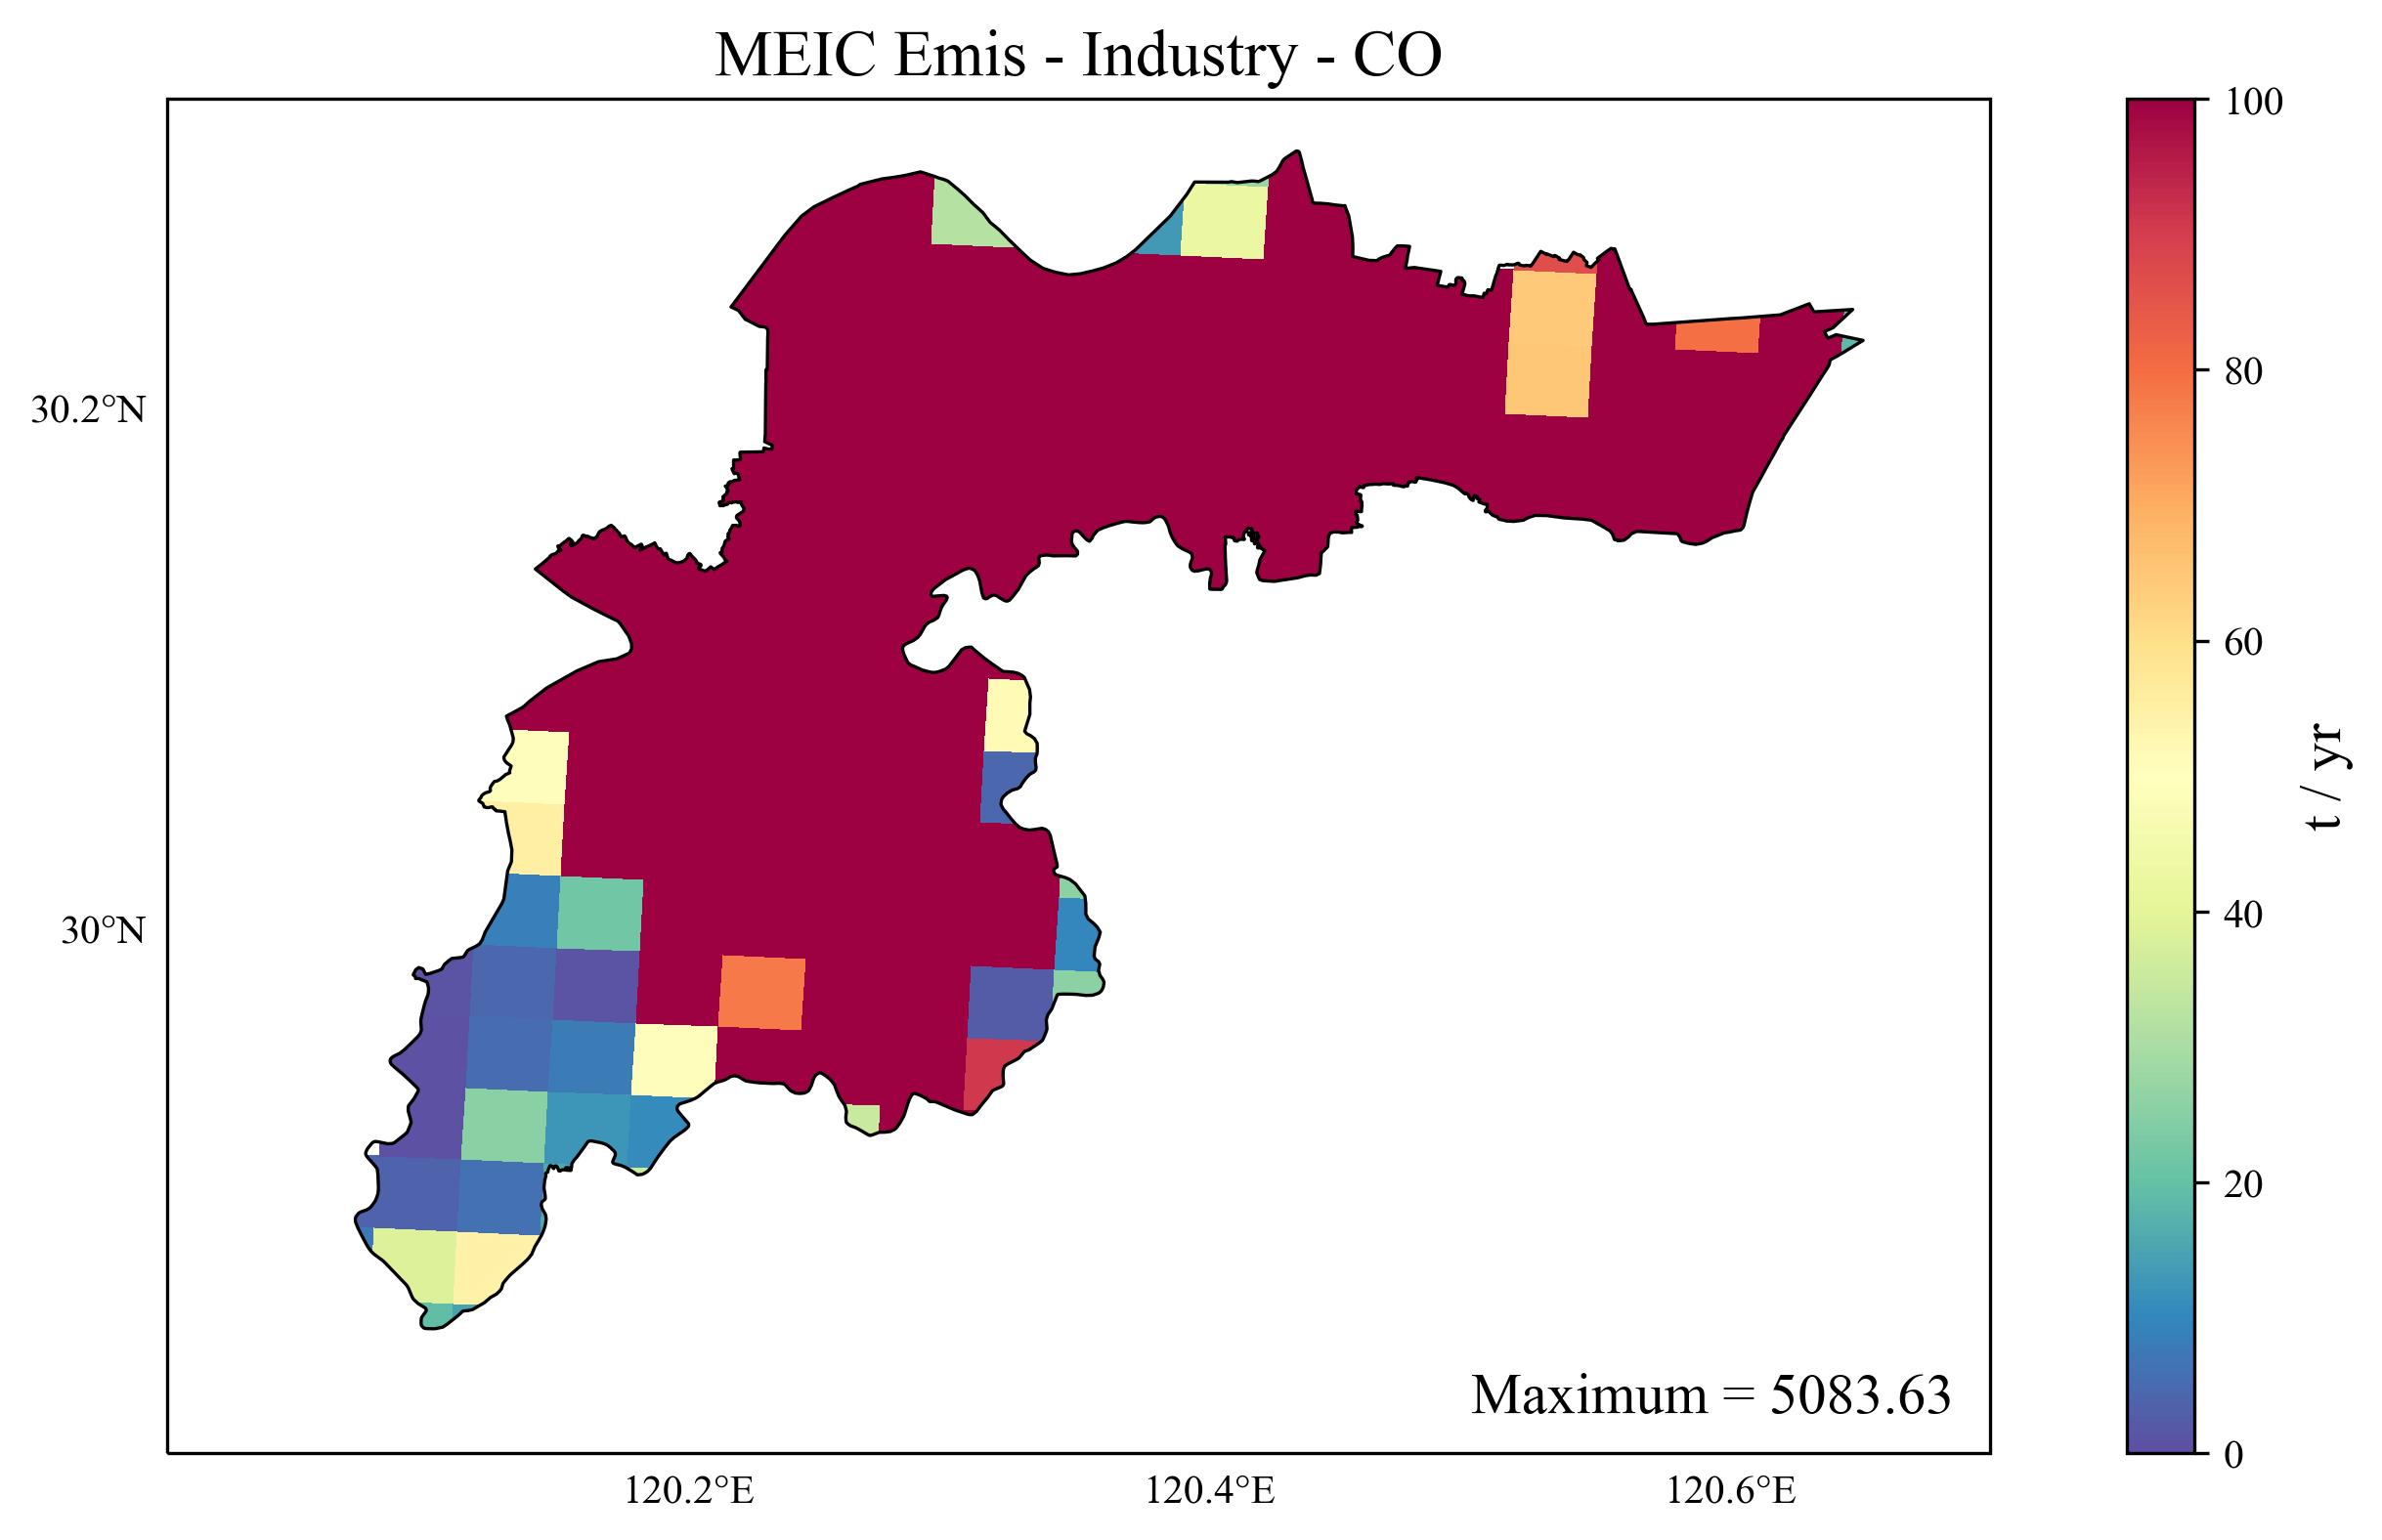

In [27]:
CO = meic_ind.CO.sum(dim='TSTEP').squeeze()
CO_xs = CO.where(mask_da)

data = (CO_xs*30)

cmin   = 0
cmax   = 100
clevel = 20

ax = pcolor_xiaoshan(lon,lat,data,cmin,cmax,
                map_polygon=xiaoshan,mask_polygon=xiaoshan,
                extent=[120., 120.7, 29.8, 30.32],colorlevel=clevel)
ax.set_title('MEIC Emis - Industry - CO',size=16)
plt.show()

## NH3

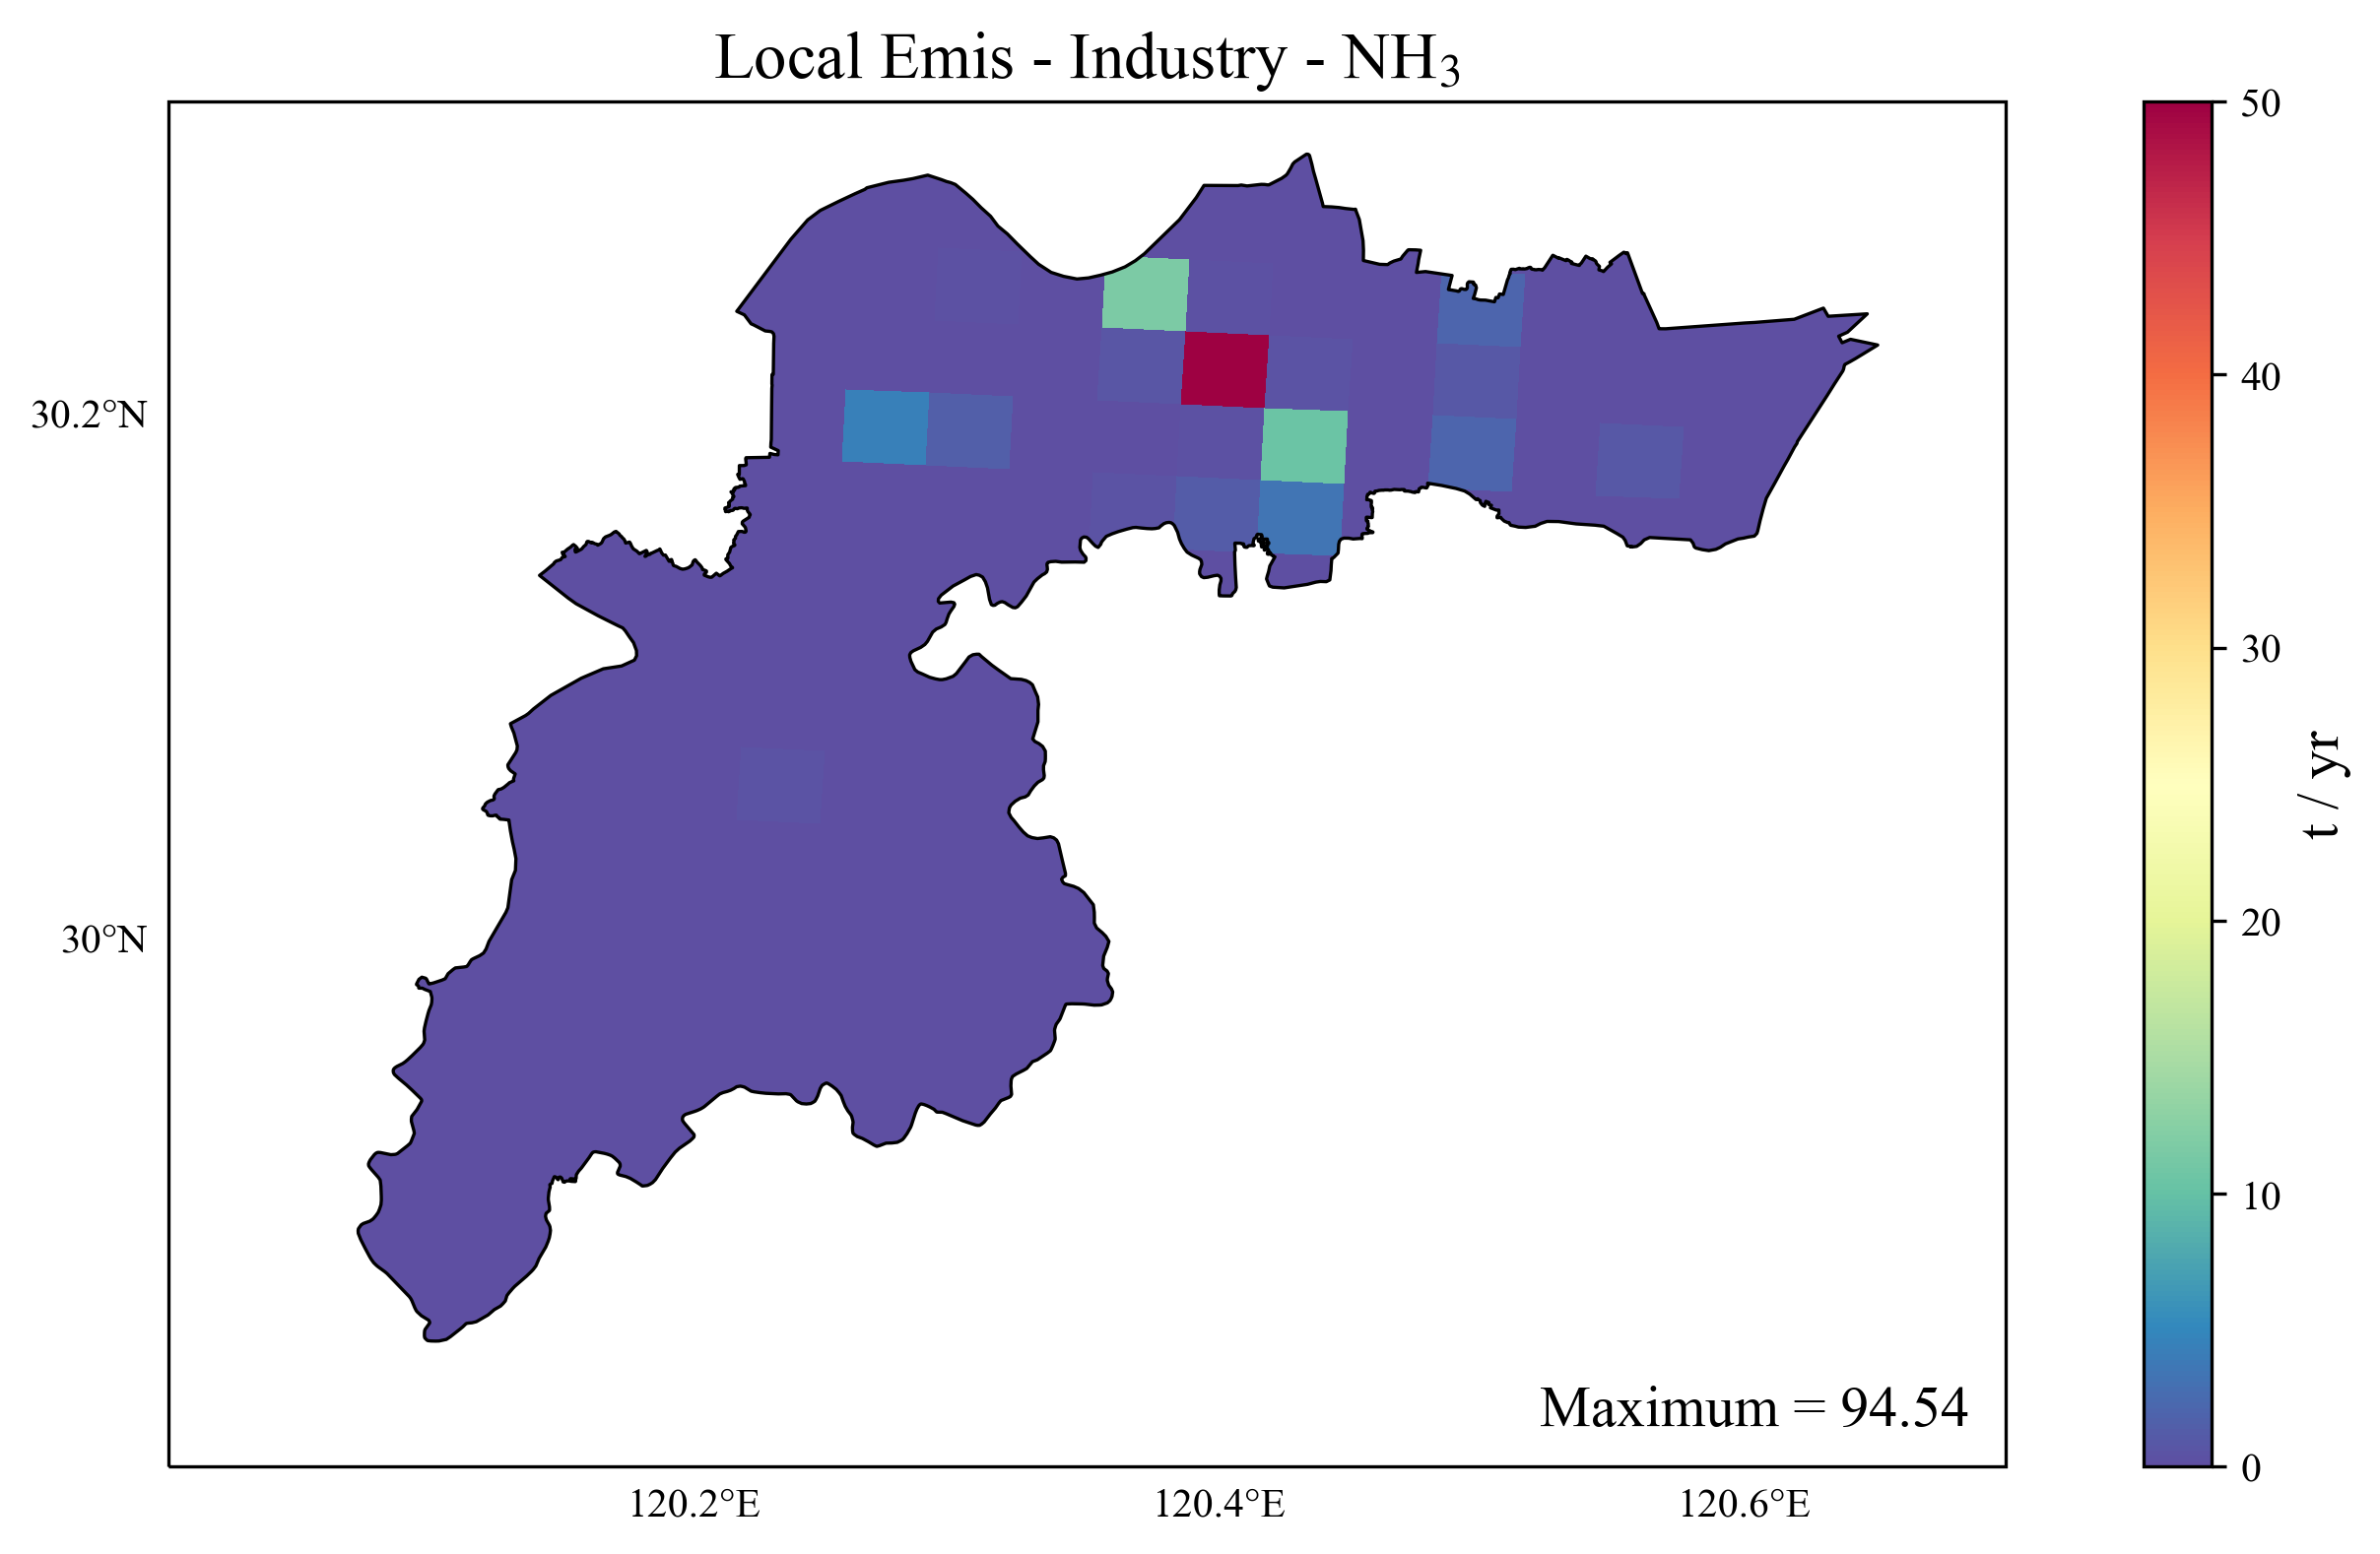

In [21]:
data = local_ind.NH3.squeeze()

cmin   = 0
cmax   = 50
clevel = 10

ax = pcolor_xiaoshan(lon,lat,data,cmin,cmax,
                map_polygon=xiaoshan,mask_polygon=xiaoshan,
                extent=[120., 120.7, 29.8, 30.32],colorlevel=clevel)
ax.set_title('Local Emis - Industry - NH$_3$',size=16)
plt.show()


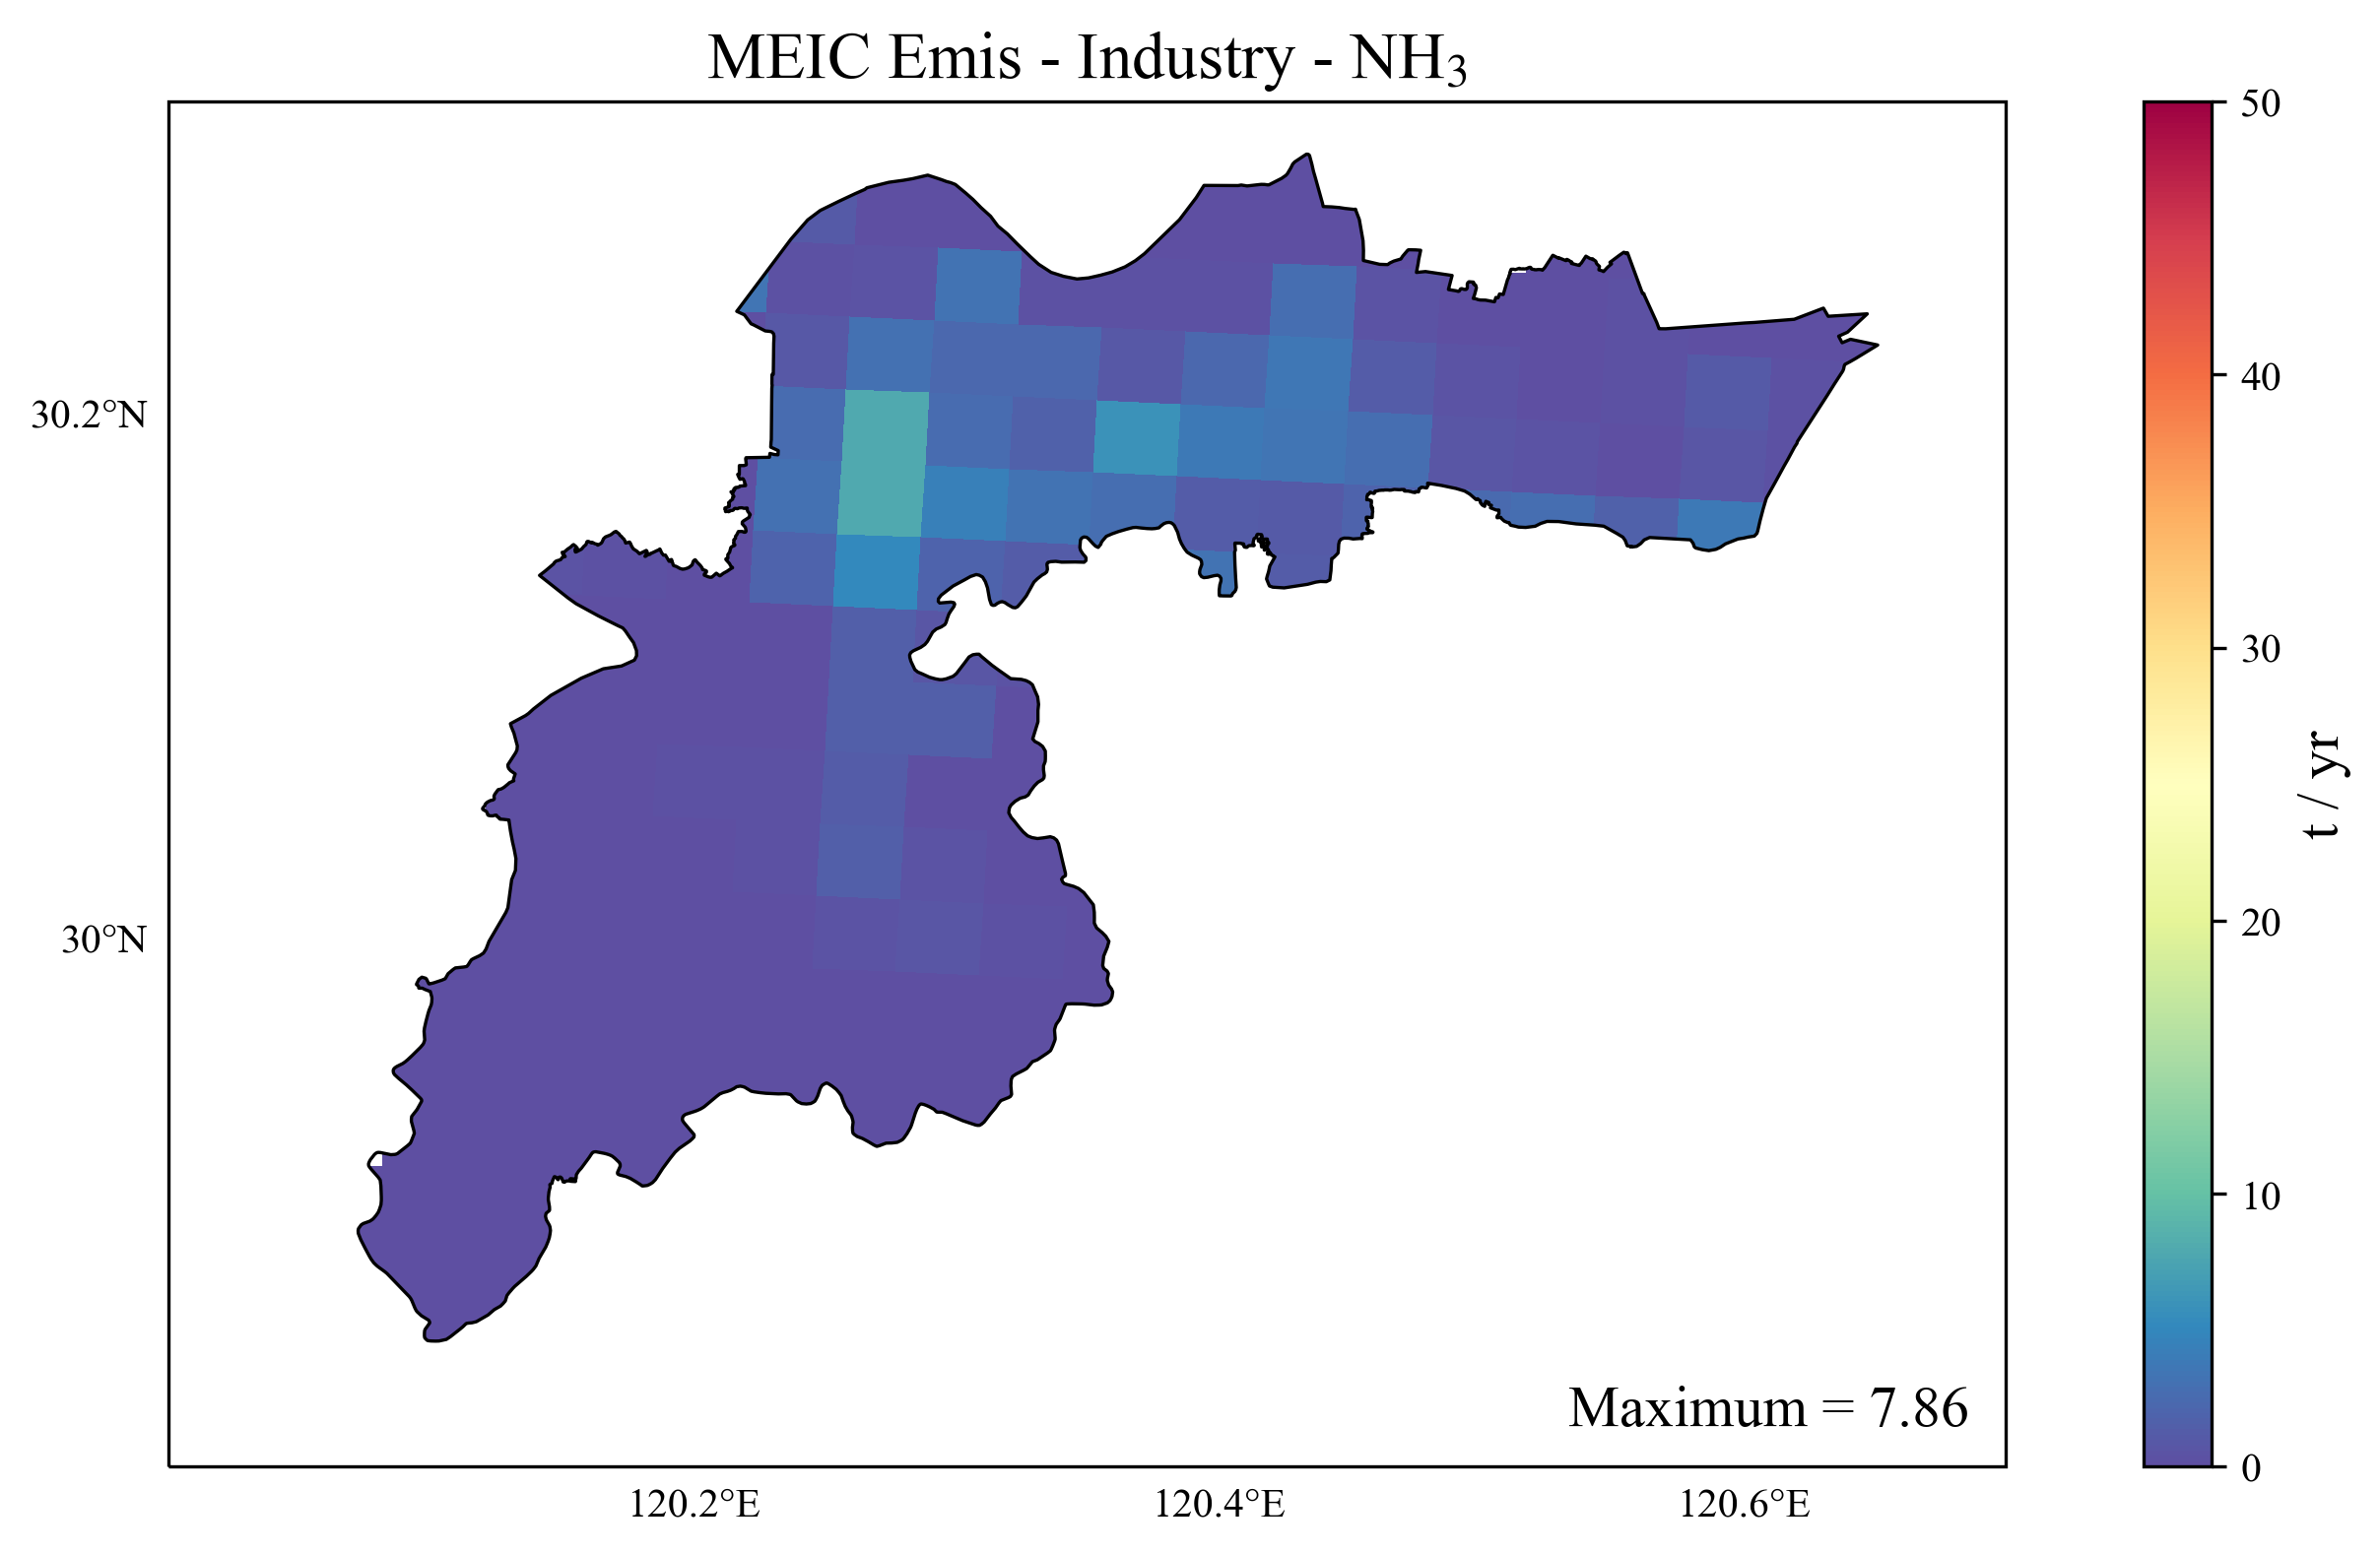

In [28]:
NH3 = meic_ind.NH3.sum(dim='TSTEP').squeeze()
NH3_xs = NH3.where(mask_da)

data = (NH3_xs*18)

lon = local_ind.longitude
lat = local_ind.latitude

cmin   = 0
cmax   = 50
clevel = 10

ax = pcolor_xiaoshan(lon,lat,data,cmin,cmax,
                map_polygon=xiaoshan,mask_polygon=xiaoshan,
                extent=[120., 120.7, 29.8, 30.32],colorlevel=clevel)
ax.set_title('MEIC Emis - Industry - NH$_3$',size=16)
plt.show()